In [10]:
%autosave 120
import pandas as pd

Autosaving every 120 seconds


In [11]:
#Utilizando alguns comandos do sistema Unix
!ls ./Data/movielens

ls: cannot access './Data/movielens': No such file or directory


In [12]:
!head -5 ./Data/movielens/movies.csv

head: cannot open './Data/movielens/movies.csv' for reading: No such file or directory


<p style="font-size:1.75em; color:purple" ><br>
    Usando o pandas para ler um dataframe
    </p>

Nossos datasets consistem de:<br/>
* __ratings.csv__ : userid, movieid, rating, timestamp
* __tags.csv__ : userid, movieid, timestamp
* __movies.csv__ : movieid, title, genres

In [13]:
movies = pd.read_csv('./Data/movielens/movies.csv', sep=',')
print(type(movies))
movies.head()

FileNotFoundError: [Errno 2] File b'./Data/movielens/movies.csv' does not exist: b'./Data/movielens/movies.csv'

In [ ]:
#Timestamps  representa os segundos de acordo com UTC(Coordinates Uniserval Time)
tags = pd.read_csv('./Data/movielens/tags.csv', sep=',')
tags.head()

In [ ]:
ratings = pd.read_csv('./Data/movielens/ratings.csv', sep=',', parse_dates=['timestamp'])
ratings.head()

In [ ]:
#Para analise atual excluiremos as colunas de timestamp

del ratings['timestamp']
del tags['timestamp']

In [ ]:
tags.index, tags.columns

In [ ]:
tags.iloc[[0,11,2000]] #Extraindo a linha 0, 11 e 2000

<p style="font-size:1.75em; color:purple;" ><br>
    Discriptive Statistics
    </p>

In [ ]:
ratings['rating'].describe()

In [ ]:
ratings.describe()

In [ ]:
ratings['rating'].mean()

In [ ]:
ratings.mean()

In [ ]:
ratings['rating'].min()

In [5]:
ratings['rating'].max()

NameError: name 'ratings' is not defined

In [ ]:
ratings['rating'].std()

In [ ]:
ratings['rating'].mode() #Valor mais recorrente

In [ ]:
#correlação
ratings.corr()

In [ ]:
filter_1 = ratings['rating'] > 5 #Filtrando os elementos da coluna maiores que 5
filter_1.any() #Há algum elemento que retorne True, ou seja, algum elemento maior q 5?

#type(filter_1)

In [ ]:
filter_2 = ratings['rating'] > 0 #Filtrando os elementos maiores que zero
filter_2.all() #Verificando se todos os elementos do dataset sao maiores que zero

<p style="font-size:1.75em; color:purple;" ><br>
    Data Cleaning
    </p>

In [6]:
movies.shape

NameError: name 'movies' is not defined

In [ ]:
movies.head()

In [ ]:
#Há algum valor NULL no dataset?
movies.isnull().any()

In [ ]:
tags.shape

In [ ]:
tags.isnull().any()

In [ ]:
#Removendo os valores nulos
tags = tags.dropna()

In [ ]:
tags.isnull().any()

In [ ]:
tags.shape

<p style="font-size:1.75em; color:purple;" ><br>
    Data Visualization
    </p>

In [7]:
%matplotlib inline

In [8]:
#Histograma
ratings.hist(column='rating', figsize=(7,5))

NameError: name 'ratings' is not defined

In [ ]:
#Boxplot
ratings.boxplot(column='rating', figsize=(8,10))

<p style="font-size:1.75em; color:purple;" ><br>
    Frequent Data Operations
    </p>

In [9]:
tags.head()

NameError: name 'tags' is not defined

In [ ]:
tags['tag'].head()

In [ ]:
movies[['title', 'genres']].head()

In [ ]:
ratings[:10]

In [ ]:
#Verificando a ocorrencia dos elementos
tag_counts = tags['tag'].value_counts()
tag_counts[:10]

In [ ]:
tag_counts[:10].plot(kind='bar', figsize=(7,5))

<p style="font-size:1.5em; color:purple;" ><br>
    Filters
    </p>

In [37]:
#Filtro dos filmes mais bem avaliados
is_highly_rated = ratings['rating'] >= 4.0

ratings[is_highly_rated][-5:]

,userId,movieId,rating
20000256,138493,66762,4.5
20000257,138493,68319,4.5
20000258,138493,68954,4.5
20000259,138493,69526,4.5
20000261,138493,70286,5.0


In [38]:
#Filtro por genero
is_animation = movies['genres'].str.contains('Animation')
#is_animation
movies[is_animation][:15]

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
12,13,Balto (1995),Adventure|Animation|Children
47,48,Pocahontas (1995),Animation|Children|Drama|Musical|Romance
236,239,"Goofy Movie, A (1995)",Animation|Children|Comedy|Romance
241,244,Gumby: The Movie (1995),Animation|Children
310,313,"Swan Princess, The (1994)",Animation|Children
360,364,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX
388,392,"Secret Adventures of Tom Thumb, The (1993)",Adventure|Animation
547,551,"Nightmare Before Christmas, The (1993)",Animation|Children|Fantasy|Musical
553,558,"Pagemaster, The (1994)",Action|Adventure|Animation|Children|Fantasy


<p style="font-size:1.5em; color:purple;" ><br>
    Aggregate
    </p>

In [39]:
#Agrupando os dados por avaliações
#Quantos elementos existem para cada valor de avaliação?

ratings_count = ratings[['movieId', 'rating']].groupby('rating').count()
ratings_count

,movieId
rating,
0.5,239125
1.0,680732
1.5,279252
2.0,1430997
2.5,883398
3.0,4291193
3.5,2200156
4.0,5561926
4.5,1534824


In [40]:
#Agrupando por filmes que contenham a média das notas
average_rating = ratings[['movieId', 'rating']].groupby('movieId').mean()
average_rating.tail()

,rating
movieId,
131254,4.0
131256,4.0
131258,2.5
131260,3.0
131262,4.0


In [41]:
#Quantas avaliações existem, em nosso dataset, para cada filme?
average_rating = ratings[['movieId', 'rating']].groupby('movieId').count()
average_rating.head()

,rating
movieId,
1,49695
2,22243
3,12735
4,2756
5,12161


<p style="font-size:1.5em; color:purple;" ><br>
    Merging DataFrames <br>
</p>
<a href=https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html> Documentation</a>


In [44]:
tags.head()

,userId,movieId,tag
0,18,4141,Mark Waters
1,65,208,dark hero
2,65,353,dark hero
3,65,521,noir thriller
4,65,592,dark hero


In [45]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [47]:
t = movies.merge(tags, on='movieId', how='inner')
t.head()

,movieId,title,genres,userId,tag
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1644,Watched
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,computer animation
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,Disney animated feature
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,Pixar animation
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,TÃ©a Leoni does not star in this movie


In [52]:
#Agrupando as avaliações dos filmes com base na sua identificação
#O parametro as_index=False fará com que novos indices sequenciais sejam criados
avg_rating = ratings.groupby('movieId', as_index=False).mean()
#avg_rating.head()
del avg_rating['userId']
avg_rating.head()

,movieId,rating
0,1,3.921240
1,2,3.211977
2,3,3.151040
3,4,2.861393
4,5,3.064592


In [57]:
box_office = movies.merge(avg_rating, on='movieId', how='inner')
box_office.tail()

,movieId,title,genres,rating
26739,131254,Kein Bund für's Leben (2007),Comedy,4.0
26740,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,4.0
26741,131258,The Pirates (2014),Adventure,2.5
26742,131260,Rentun Ruusu (2001),(no genres listed),3.0
26743,131262,Innocence (2014),Adventure|Fantasy|Horror,4.0


In [58]:
#Filtro das melhores avaliações
is_highly_rated = box_office['rating'] >= 4.0
box_office[is_highly_rated][-5:]

,movieId,title,genres,rating
26737,131250,No More School (2000),Comedy,4.0
26738,131252,Forklift Driver Klaus: The First Day on the Jo...,Comedy|Horror,4.0
26739,131254,Kein Bund für's Leben (2007),Comedy,4.0
26740,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,4.0
26743,131262,Innocence (2014),Adventure|Fantasy|Horror,4.0


In [59]:
#Filtro de genero
is_comedy = box_office['genres'].str.contains('Comedy')
box_office[is_comedy][:5]

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.921240
2,3,Grumpier Old Men (1995),Comedy|Romance,3.151040
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.861393
4,5,Father of the Bride Part II (1995),Comedy,3.064592
6,7,Sabrina (1995),Comedy|Romance,3.366484


In [60]:
box_office[is_comedy & is_highly_rated][-5:]

,movieId,title,genres,rating
26736,131248,Brother Bear 2 (2006),Adventure|Animation|Children|Comedy|Fantasy,4.0
26737,131250,No More School (2000),Comedy,4.0
26738,131252,Forklift Driver Klaus: The First Day on the Jo...,Comedy|Horror,4.0
26739,131254,Kein Bund für's Leben (2007),Comedy,4.0
26740,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,4.0


<p style="font-size:1.5em; color:purple;" ><br>
    Frequent String Operations
</p>

In [61]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [10]:
#Split
movie_genres = movies['genres'].str.split('|', expand=True)
#Argumento 'expand=True' garante que o output da função seja um dataframe, por padrão é retornado uma Série
movie_genres[:20]

NameError: name 'movies' is not defined

In [69]:
#Add uma nova coluna
#Se for um filme de comédia: True
movie_genres['isComedy'] = movies['genres'].str.contains('Comedy')
movie_genres[:10]

,0,1,2,3,4,5,6,7,8,9,isComedy
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None,True
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None,False
2,Comedy,Romance,None,None,None,None,None,None,None,None,True
3,Comedy,Drama,Romance,None,None,None,None,None,None,None,True
4,Comedy,None,None,None,None,None,None,None,None,None,True
5,Action,Crime,Thriller,None,None,None,None,None,None,None,False
6,Comedy,Romance,None,None,None,None,None,None,None,None,True
7,Adventure,Children,None,None,None,None,None,None,None,None,False
8,Action,None,None,None,None,None,None,None,None,None,False
9,Action,Adventure,Thriller,None,None,None,None,None,None,None,False


In [71]:
#Extraindo parte de uma string
#criando uma nova coluna com os ano do titulo
movies['year'] = movies['title'].str.extract('.*\((.*)\).*', expand=True)
movies.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


<p style="font-size:1.5em; color:purple" ><br>
    Parsing Timestamps
</p>

In [4]:
#Reload tags dataframe
tags = pd.read_csv('./Data/movielens/tags.csv', sep=',')

In [5]:
tags.dtypes

userId        int64
movieId       int64
tag          object
timestamp     int64
dtype: object

In [6]:
tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


In [7]:
#Convertendo a coluna timestamp em um padrão de data do Python
tags['parsed_time'] = pd.to_datetime(tags['timestamp'], unit='s')

In [8]:
#Formato esperado para uma data no Pyhton
tags['parsed_time'].dtype

dtype('<M8[ns]')

In [9]:
tags.head()

,userId,movieId,tag,timestamp,parsed_time
0,18,4141,Mark Waters,1240597180,2009-04-24 18:19:40
1,65,208,dark hero,1368150078,2013-05-10 01:41:18
2,65,353,dark hero,1368150079,2013-05-10 01:41:19
3,65,521,noir thriller,1368149983,2013-05-10 01:39:43
4,65,592,dark hero,1368150078,2013-05-10 01:41:18


In [92]:
#Criando filtros com o novo formato de datas criado
#Titulos add após da data t
grater_than_t = tags['parsed_time'] > '2015-02-01'

selected_rows = tags[grater_than_t]

tags.shape, selected_rows.shape

((465564, 5), (12130, 5))

In [95]:
#Ordenando o dataframe conforme a sua data
tags.sort_values(by='parsed_time', ascending=True)[:10]

,userId,movieId,tag,timestamp,parsed_time
333932,100371,2788,monty python,1135429210,2005-12-24 13:00:10
333927,100371,1732,coen brothers,1135429236,2005-12-24 13:00:36
333924,100371,1206,stanley kubrick,1135429248,2005-12-24 13:00:48
333923,100371,1193,jack nicholson,1135429371,2005-12-24 13:02:51
333939,100371,5004,peter sellers,1135429399,2005-12-24 13:03:19
333922,100371,47,morgan freeman,1135429412,2005-12-24 13:03:32
333921,100371,47,brad pitt,1135429412,2005-12-24 13:03:32
333936,100371,4011,brad pitt,1135429431,2005-12-24 13:03:51
333937,100371,4011,guy ritchie,1135429431,2005-12-24 13:03:51
333920,100371,32,bruce willis,1135429442,2005-12-24 13:04:02


<p style="font-size:2.5em; color:purple" ><br>
    Hypothesis test
</p>

### _As avaliações dos filmes estão relacionadas com seu ano de lançamento_?

In [100]:
#Agrupando cada filme a sua avaliação
average_rating = ratings[['movieId', 'rating']].groupby('movieId', as_index=False).mean()
average_rating.tail()

,movieId,rating
26739,131254,4.0
26740,131256,4.0
26741,131258,2.5
26742,131260,3.0
26743,131262,4.0


In [103]:
#Unindo os data frames

#movies.head()
joined = movies.merge(average_rating, on='movieId', how='inner')
joined.tail()

,movieId,title,genres,year,rating
26739,131254,Kein Bund für's Leben (2007),Comedy,2007,4.0
26740,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,2002,4.0
26741,131258,The Pirates (2014),Adventure,2014,2.5
26742,131260,Rentun Ruusu (2001),(no genres listed),2001,3.0
26743,131262,Innocence (2014),Adventure|Fantasy|Horror,2014,4.0


In [104]:
#Verificando a correlação entre os filmes  e suas avaliações
joined.corr()

,movieId,rating
movieId,1.000000,-0.090369
rating,-0.090369,1.000000


In [117]:
#Agrupando duas colunas do dataframe joined e separando-as em outro dataframe
yearly_average = joined[['year','rating']].groupby('year', as_index=False).mean()
yearly_average[:10]

,year,rating
0,1891,3.000000
1,1893,3.375000
2,1894,3.071429
3,1895,3.125000
4,1896,3.183036
5,1898,3.850000
6,1899,3.625000
7,1900,3.166667
8,1901,5.000000
9,1902,3.738189


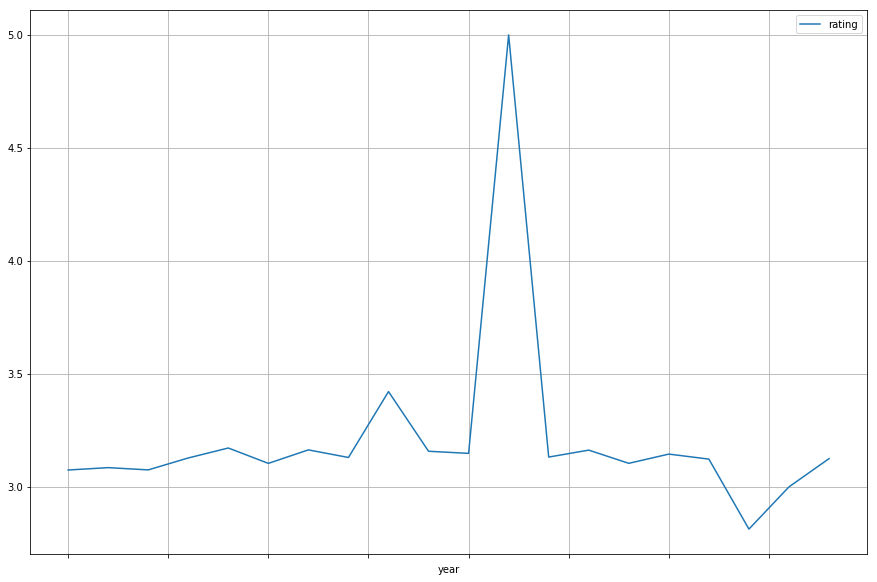

In [118]:
yearly_average[-20:].plot(x='year', y='rating', figsize=(15,10), grid=True)

___Para um aprofundamento maior na bib Pandas:___<br/>
https://www.youtube.com/watch?v=HN5d490_KKk